# Step by step approach

This approach allows one to specify different variables of the porcess.

In [1]:
# Import the necessary libraries
import skimage as sk
from dottamine import dotim
import matplotlib.pyplot as plt

In [2]:
# Load the 4 image. Get a 2D slice since we will be working in 2D images
image = sk.io.imread('./../../Python_vscode/domes/domes_n2v/70_denoised.tif') # 4D image
image = image[2][400] # Select a 2D slice

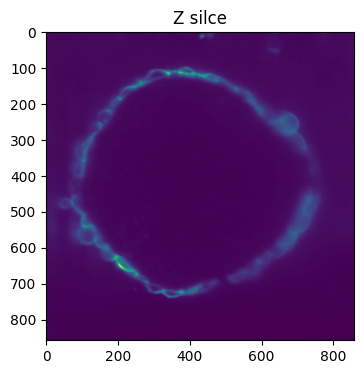

In [3]:
plt.figure(figsize=(4,4))
plt.imshow(image)
plt.title('Z silce');

Your image has 2 dimensions. It contains 2 spatial dimensions. Time is False.


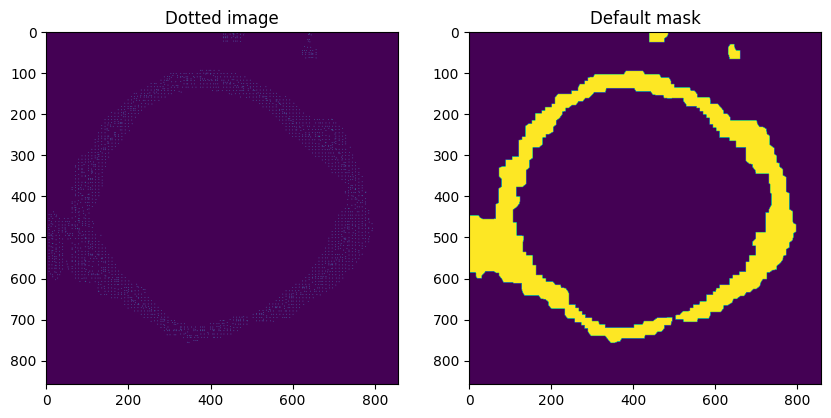

In [4]:
# Put the image inside dots
dots = dotim(image=image, is2D=True)

# Print basic information of the image
dots.hi()

# Convolve and upconvolve the image
convdeconv = dots.conv_deconv(times=3, binshape=(2,2)) # There is no need to run this conv_deconv process to get the mask.

# Get the mask
mask = dots.get_mask()

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(convdeconv)
plt.title('Dotted image');
plt.subplot(122)
plt.imshow(mask)
plt.title('Default mask');


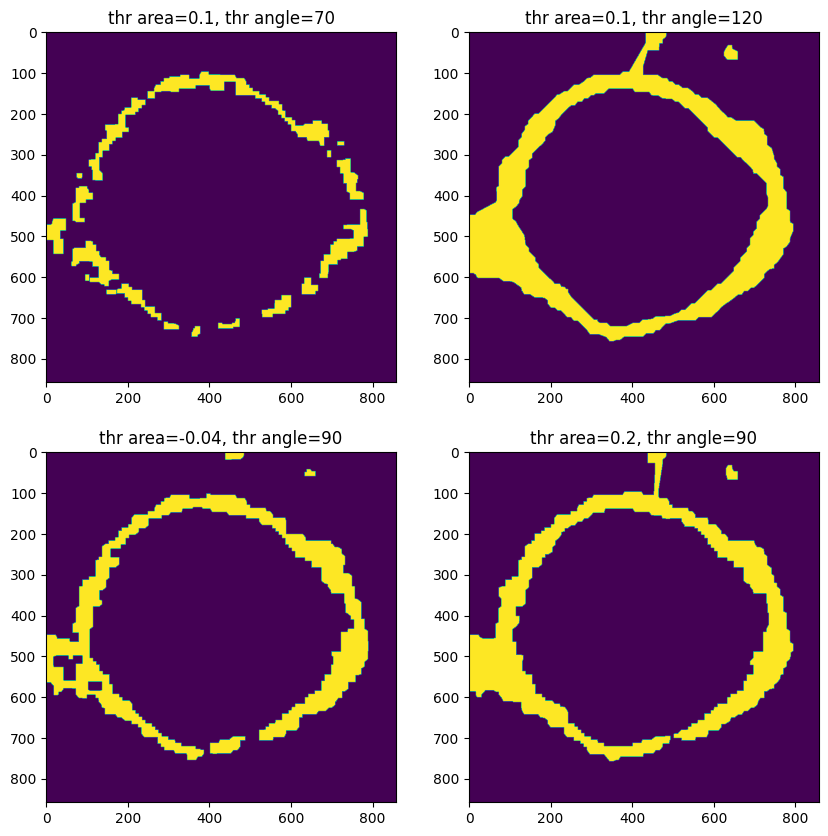

In [5]:
# Nontheless, the triangles can be modified for more suitable results
mask2 = dots.get_mask(threshold_angle=70)
mask3 = dots.get_mask(threshold_angle=120)
mask4 = dots.get_mask(threshold_area=-0.04)
mask5 = dots.get_mask(threshold_area=0.2)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(mask2)
plt.title('thr area=0.1, thr angle=70')
plt.subplot(222)
plt.imshow(mask3)
plt.title('thr area=0.1, thr angle=120')
plt.subplot(223)
plt.imshow(mask4)
plt.title('thr area=-0.04, thr angle=90')
plt.subplot(224)
plt.imshow(mask5)
plt.title('thr area=0.2, thr angle=90');

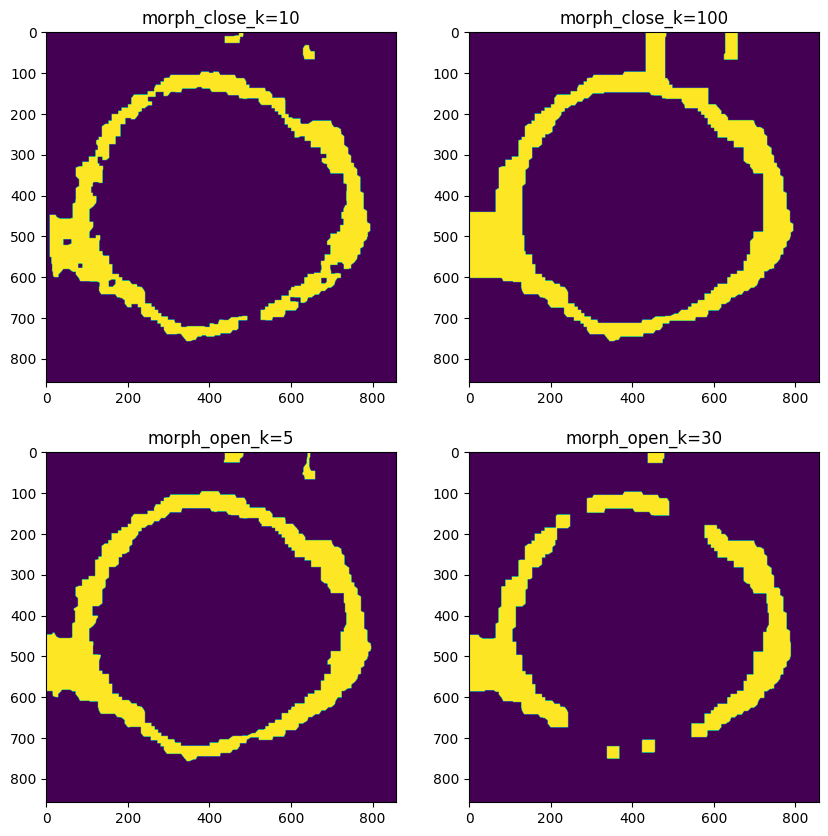

In [6]:
# You may also want to modify the final shape by modifying the morphology
mask6 = dots.get_mask(morph_close_k=10)
mask7 = dots.get_mask(morph_close_k=100)
mask8 = dots.get_mask(morph_open_k=5)
mask9 = dots.get_mask(morph_open_k=30)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(mask6)
plt.title('morph_close_k=10')
plt.subplot(222)
plt.imshow(mask7)
plt.title('morph_close_k=100')
plt.subplot(223)
plt.imshow(mask8)
plt.title('morph_open_k=5')
plt.subplot(224)
plt.imshow(mask9)
plt.title('morph_open_k=30');


Save the image

In [ ]:
import tifffile as tiff
import numpy as np

# To save the image in a format that can be visualized without any application such as imagej first normalize to 255
mask = (mask - mask.min()) / (mask.max() - mask.min()) * 255

# Save the tif converted to uint8
tiff.imwrite('masked_image.tif', mask.astype(np.uint8))